In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

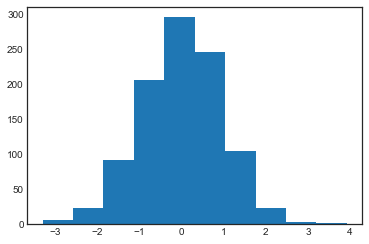

In [2]:
plt.hist(data);

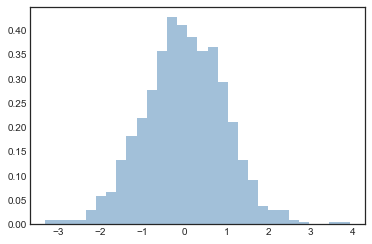

In [4]:
# can easily customize

plt.hist(data, bins=30, density=True, alpha=.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none');

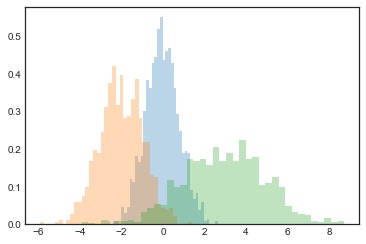

In [6]:
# alpha is useful when comparing several distributions

x1 = np.random.normal(0, .8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [7]:
# can compute the histogram (# of items per bin) without displaying it

counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 29 298 540 128   5]


In [8]:
## 2d histograms and binnings

In [9]:
mean = [0, 0]
cov=[[1, 1,], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

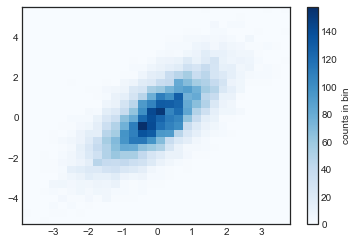

In [10]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [11]:
# can also just calculate the bins

counts, xedges, yedges = np.histogram2d(x, y, bins=30)

In [12]:
## Hexagonal binnings

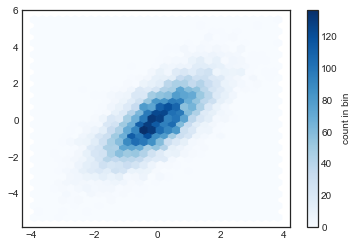

In [13]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

In [14]:
## Kernel Density Estimation

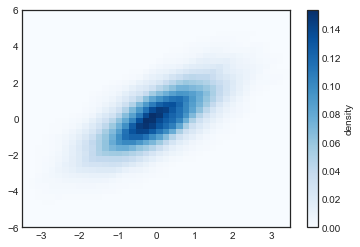

In [15]:
# "smears out" the points in space and smooths out the result

from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
          origin='lower', aspect='auto',
          extent=[-3.5, 3.5, -6, 6],
          cmap='Blues')
cb = plt.colorbar()
cb.set_label('density')

In [16]:
# seaborn library has a much more terse approach to displaying these types of plots